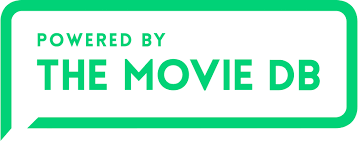

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt,cm
from warnings import filterwarnings as fw
fw('ignore')
%matplotlib inline

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
train = pd.read_csv('../input/train.csv')
train.head()

### So we have the task of predicting the revenue of the movies and the numerical features given are the cost in making of the movie and popularity of the movie. We will make a model based on these features.

In [ ]:
train.corr()

In [ ]:
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [ ]:
print('Descriptive Stats for the revenue are:\n ', train.revenue.describe())
sns.distplot(train.revenue);

In [ ]:
sns.jointplot(train.budget, train.revenue);
sns.jointplot(train.popularity, train.revenue);
sns.jointplot(train.runtime, train.revenue);
plt.show()

In [ ]:
# taking care of missing values
train['runtime'] = train['runtime'].fillna(method='ffill')

In [ ]:
# Pairplot
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(train[['runtime', 'budget', 'popularity']], c=train.revenue, cmap=cmap, figsize=(12,12), marker='o', s=40,
                           hist_kwds = {'bins' : 15})

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111,projection = '3d')
ax.scatter(train['budget'],train['runtime'],train['popularity'], c = train['revenue'], marker = 'o', s = 100)
ax.set_xlabel('Budget of the Movie',fontsize=15)
ax.set_ylabel('Runtime of the Movie',fontsize=15)
ax.set_zlabel('Popularity of the Movie',fontsize=15)
plt.show()


In [ ]:
train.status = pd.get_dummies(train.status)
train.status.head()

## Model Building

In [ ]:
X = train[['runtime', 'budget','popularity','status']]
y = train.revenue
#splitting the data into training and validation to check validity of the model

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=1)

In [ ]:
#Linear Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
def rmsle(y,y0): return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0)))) 
reg = LinearRegression()
lin_model = reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
print('RMSLE score for linear model is {}'.format(rmsle(y_val, y_pred)))

#Applyting the model on test data and submission
test = pd.read_csv('../input/test.csv')
test['runtime'] = test.runtime.fillna(method='ffill')
test.status = pd.get_dummies(test.status)
X_test = test[['runtime','popularity','budget','status']]
pred1 = reg.predict(X_test)

#Submission
sub1 = pd.read_csv('../input/sample_submission.csv')
sub1['revenue'] = pred1
sub1.to_csv('lin_model_sub.csv',index=False)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_val)
print('RMSLE score for k-NN model is {}'.format(rmsle(y_val, knn_y_pred)))
pred2 = knn.predict(X_test)

#Submission
sub2 = pd.read_csv('../input/sample_submission.csv')
sub2['revenue'] = pred2
sub2.to_csv('knn_model_sub.csv',index=False)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_val)
print('RMSLE score for Random Forest model is {}'.format(rmsle(y_val, rf_y_pred)))
pred3 = rf.predict(X_test)

#Submission
sub3 = pd.read_csv('../input/sample_submission.csv')
sub3['revenue'] = pred3
sub3.to_csv('rf_model_sub.csv',index=False)
